In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Leitura dos arquivos CSV
df_vendas = pd.read_csv('..\\BASE_DADOS\\olist_order_items_dataset.csv')
df_pedidos_cliente = pd.read_csv('..\\BASE_DADOS\\olist_orders_dataset.csv')
df_produtos = pd.read_csv('..\\BASE_DADOS\\olist_products_dataset.csv')

Tempo médio de entrega: 11.55 dias


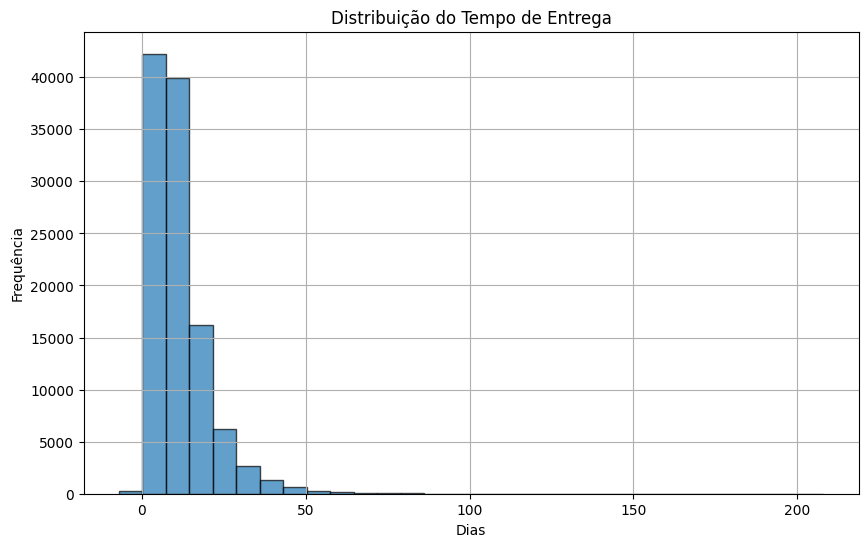

<Figure size 1000x600 with 0 Axes>

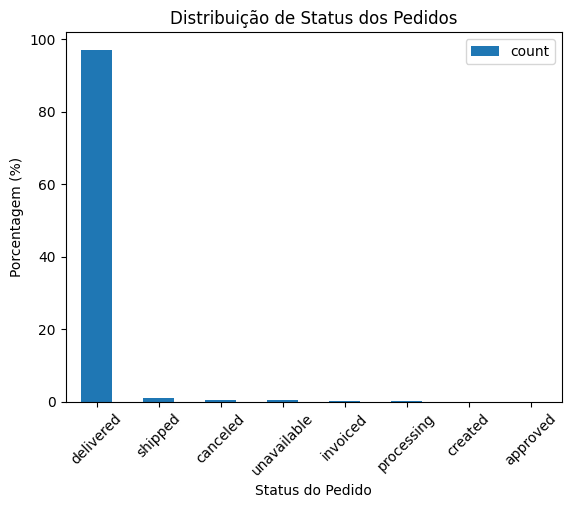


Porcentagem de cada status de pedido:


,count
order_status,
delivered,97.020344
shipped,1.113223
canceled,0.628513
unavailable,0.612423
invoiced,0.315765
processing,0.302692
created,0.005028
approved,0.002011


In [3]:
# QUESTAO 2 - ANÁLISE DE LOGÍSTICA
# a) Prazos de Entrega: Calcular o tempo médio de entrega e 
# identificar os fatores que influenciam atrasos nas entregas. 


# Carregamento dos dados
produtos = df_produtos  
vendas = df_vendas
pedidos = df_pedidos_cliente

# Mesclagem das tabelas de produtos e vendas
dados_mesclados = pd.merge(vendas, produtos, on='product_id')
dados_mesclados = pd.merge(dados_mesclados, pedidos, on='order_id')

# Conversão das colunas de data para datetime
dados_mesclados['order_purchase_timestamp'] = pd.to_datetime(dados_mesclados['order_purchase_timestamp'])
dados_mesclados['order_approved_at'] = pd.to_datetime(dados_mesclados['order_approved_at'])
dados_mesclados['order_delivered_carrier_date'] = pd.to_datetime(dados_mesclados['order_delivered_carrier_date'])
dados_mesclados['order_delivered_customer_date'] = pd.to_datetime(dados_mesclados['order_delivered_customer_date'])
dados_mesclados['order_estimated_delivery_date'] = pd.to_datetime(dados_mesclados['order_estimated_delivery_date'])

# Calculo do tempo de entrega real e estimado
dados_mesclados['tempo_entrega_real'] = (dados_mesclados['order_delivered_customer_date'] - dados_mesclados['order_approved_at']).dt.days
dados_mesclados['tempo_entrega_estimado'] = (dados_mesclados['order_estimated_delivery_date'] - dados_mesclados['order_approved_at']).dt.days

# Calculo do tempo médio de entrega
tempo_medio_entrega = dados_mesclados['tempo_entrega_real'].mean()

# Identificação de atrasos nas entregas
dados_mesclados['atraso'] = dados_mesclados['tempo_entrega_real'] > dados_mesclados['tempo_entrega_estimado']

# Fatores que influenciam atrasos (COLUNA STATUS)
# Calculo da contagem de cada status
status_counts = pedidos['order_status'].value_counts()

# Calculo da porcentagem de cada status
status_percentages = (status_counts / status_counts.sum()) * 100
status_percentages = pd.DataFrame(status_percentages)






# RESULTADOS

print(f"Tempo médio de entrega: {tempo_medio_entrega:.2f} dias")


# Histograma do tempo de entrega
plt.figure(figsize=(10, 6))
dados_mesclados['tempo_entrega_real'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()



# Visualização dos resultados em um gráfico de barras
plt.figure(figsize=(10, 6))
status_percentages.plot(kind='bar')
plt.title('Distribuição de Status dos Pedidos')
plt.xlabel('Status do Pedido')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=45) 
plt.show()


print("\nPorcentagem de cada status de pedido:")
status_percentages






